In [7]:
%matplotlib inline

import pickle
import matplotlib.pyplot as plt
import matplotlib
import mpld3, mpld3.plugins
import numpy as np
from collections import Counter
import pandas as pd
import seaborn

plt.rcParams['figure.figsize'] = (15, 5)

In [8]:
runners = pickle.load(open("results/2013/results.pkl", 'rb'))

In [9]:
runners["1"]

{'10k': '0:30:54',
 'name': 'Korir, Wesley',
 'division': '5',
 '25k': '1:17:16',
 'gender': 'M',
 'age': '30',
 'official': '2:12:30',
 'bib': '1',
 'genderdiv': '5',
 'ctz': '',
 '35k': '1:48:47',
 'overall': '5',
 'pace': '0:05:04',
 'state': '',
 '30k': '1:32:58',
 '5k': '0:15:54',
 'half': '1:04:54',
 '20k': '1:01:31',
 'country': 'KEN',
 'city': 'Kenya',
 '40k': '2:04:46'}

In [10]:
def bar(xs, ys):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.grid(color='white', linestyle='solid')
    ax.bar(xs, ys, fc='lightblue', alpha=0.8, edgecolor="white")

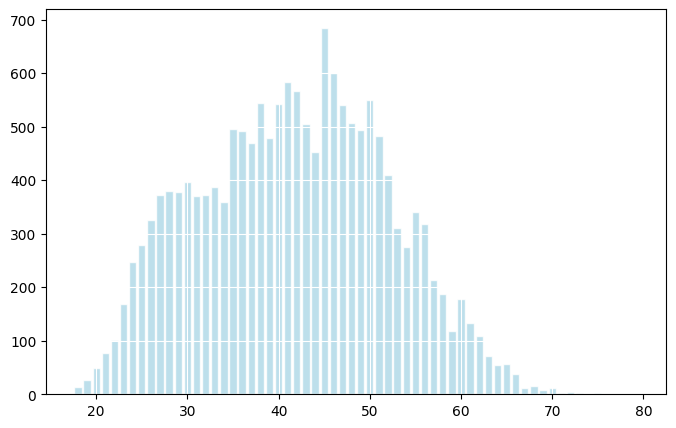

In [11]:
ages = Counter(int(x['age']) for x in runners.values())
xs = range(min(ages.keys()), max(ages.keys()))
ys = [ages[i] for i in xs]
bar(xs, ys)

[8, 12, 27, 44, 48, 70, 96, 126, 158, 166, 171, 164, 211, 188, 182, 215, 180, 243, 208, 244, 280, 244, 308, 324, 323, 288, 265, 434, 383, 343, 309, 325, 376, 348, 301, 257, 210, 272, 252, 180, 159, 98, 163, 114, 101, 66, 49, 52, 34, 12, 16, 8, 10, 2, 4, 3, 0, 3, 1, 0, 1, 0]


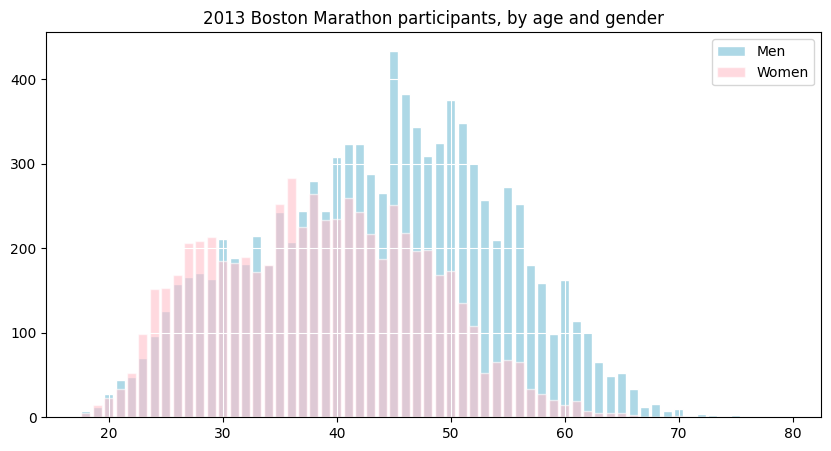

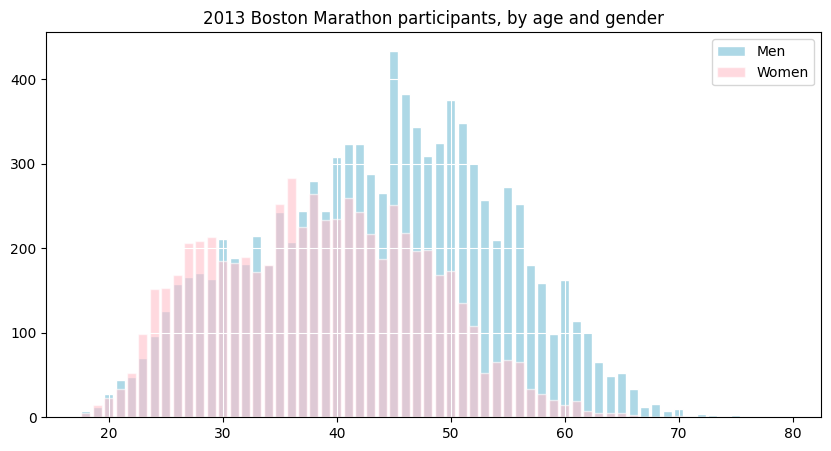

In [34]:
from collections import Counter
men = Counter(int(x['age']) for x in runners.values() if x['gender']=="M")
mxs = range(min(men.keys()), max(men.keys()))
mys = [men[i] for i in mxs]
print(mys)

wmn = Counter(int(x['age']) for x in runners.values() if x['gender']=="F")
wxs = range(min(wmn.keys()), max(wmn.keys()))
wys = [wmn[i] for i in wxs]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, title="2013 Boston Marathon participants, by age and gender")
ax.grid(color='white', linestyle='solid')
b1 = ax.bar(mxs, mys, color='lightblue', alpha=1, edgecolor="white", label="Men")
b2 = ax.bar(wxs, wys, color='pink', alpha=0.6, edgecolor="white", label="Women")
ax.legend()

fig

In [46]:
def minutes(time):
    parts = [int(x) for x in time['official'].split(':')]
    return int(parts[0] * 60 + parts[1] + parts[2]/60.)

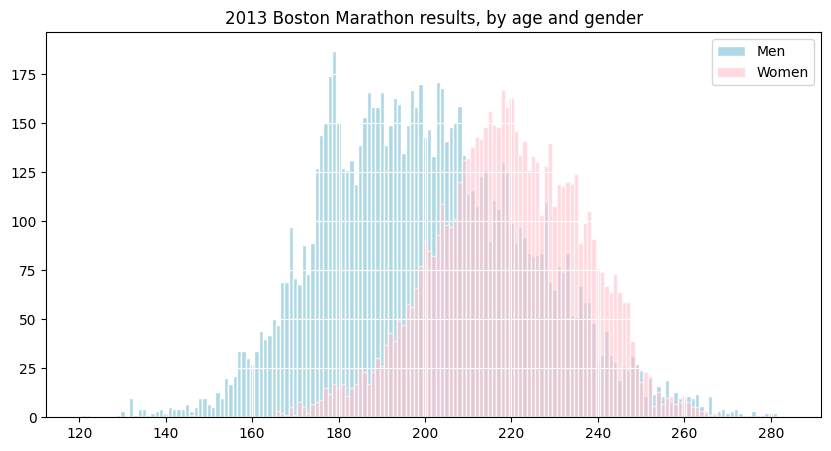

In [49]:
from collections import Counter
men = Counter(minutes(x) for x in runners.values() if x['gender']=="M" and minutes(x) > 120)
mxs = range(int(min(men.keys())), int(max(men.keys())))
mys = [men[i] for i in mxs]

wmn = Counter(minutes(x) for x in runners.values() if x['gender']=="F"  and minutes(x) > 120)
wxs = range(int(min(wmn.keys())), int(max(wmn.keys())))
wys = [wmn[i] for i in wxs]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, title="2013 Boston Marathon results, by age and gender")
ax.grid(color='white', linestyle='solid')
b1 = ax.bar(mxs, mys, color='lightblue', alpha=1, edgecolor="white", label="Men", width=1)
b2 = ax.bar(wxs, wys, color='pink', alpha=0.6, edgecolor="white", label="Women", width=1)
ax.legend()

In [16]:
r2014 = pickle.load(open("results/2014/results.pkl", 'rb'))

In [23]:
len(r2014), len(runners)

(31984, 16164)

In [58]:
r2014["30592"], minutes(list(r2014.values())[0])

({'25k': '2:48:22',
  'age': '37',
  'name': 'Wood, Samantha L.',
  'division': '6476',
  '10k': '1:05:10',
  'gender': 'F',
  'half': '2:16:18',
  'official': '5:39:06',
  'bib': '30592',
  'ctz': '',
  'country': 'USA',
  'overall': '30071',
  'pace': '0:12:57',
  'state': 'ME',
  '30k': '3:25:35',
  '5k': '0:33:01',
  'genderdiv': '13327',
  '20k': '2:09:08',
  '35k': '4:14:55',
  'city': 'Portland',
  '40k': '5:19:26'},
 306)

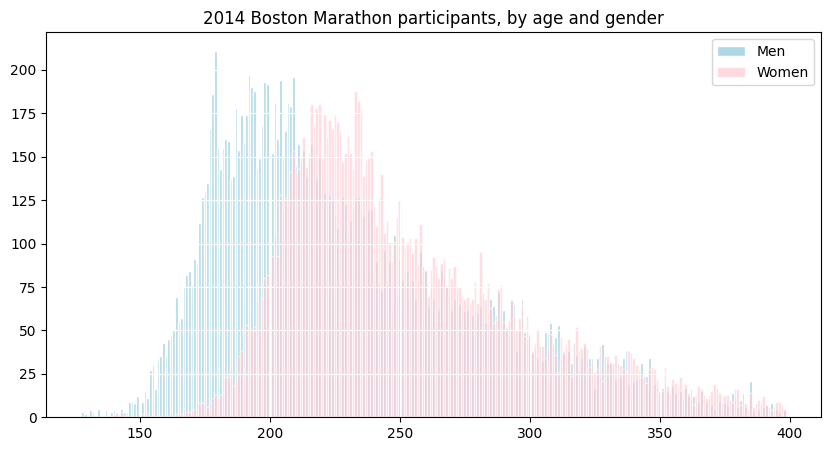

In [68]:
from collections import Counter
men = Counter(minutes(x) for x in r2014.values() if x['gender']=="M" and 400 > minutes(x) > 120)
mxs = range(min(men.keys()), max(men.keys()))
mys = [men[i] for i in mxs]

wmn = Counter(minutes(x) for x in r2014.values() if x['gender']=="F" and 400 > minutes(x) > 120)
wxs = range(min(wmn.keys()), max(wmn.keys()))
wys = [wmn[i] for i in wxs]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, title="2014 Boston Marathon participants, by age and gender")
ax.grid(color='white', linestyle='solid')
b1 = ax.bar(mxs, mys, color='lightblue', alpha=1, edgecolor="white", label="Men", width=1)
b2 = ax.bar(wxs, wys, color='pink', alpha=0.6, edgecolor="white", label="Women", width=1)
ax.legend()

# mpld3.display()

In [69]:
df = pd.read_csv("results/2014/results.csv")

In [70]:
df.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [71]:
df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


/var/folders/cj/3fpctnd52vv37y9gpdgg7c200000gn/T/ipykernel_37157/4118978522.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['official'].groupby(pd.cut(df['age'], range(15,90,5))).aggregate(np.average).plot(kind="bar", title="Average time by age group")


<Axes: title={'center': 'Average time by age group'}, xlabel='age'>

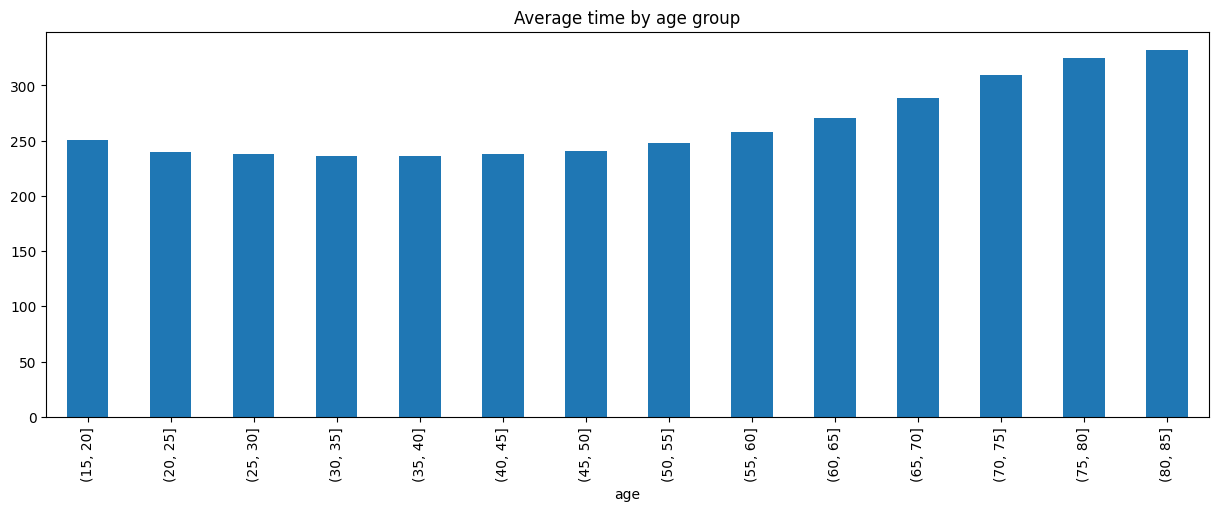

In [72]:
df['official'].groupby(pd.cut(df['age'], range(15,90,5))).aggregate(np.average).plot(kind="bar", title="Average time by age group")

/var/folders/cj/3fpctnd52vv37y9gpdgg7c200000gn/T/ipykernel_37157/1568830068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['official'].groupby(pd.cut(df['age'], range(15,90,5))).aggregate(len).plot(kind="bar", title="# of runners by age group")


<Axes: title={'center': '# of runners by age group'}, xlabel='age'>

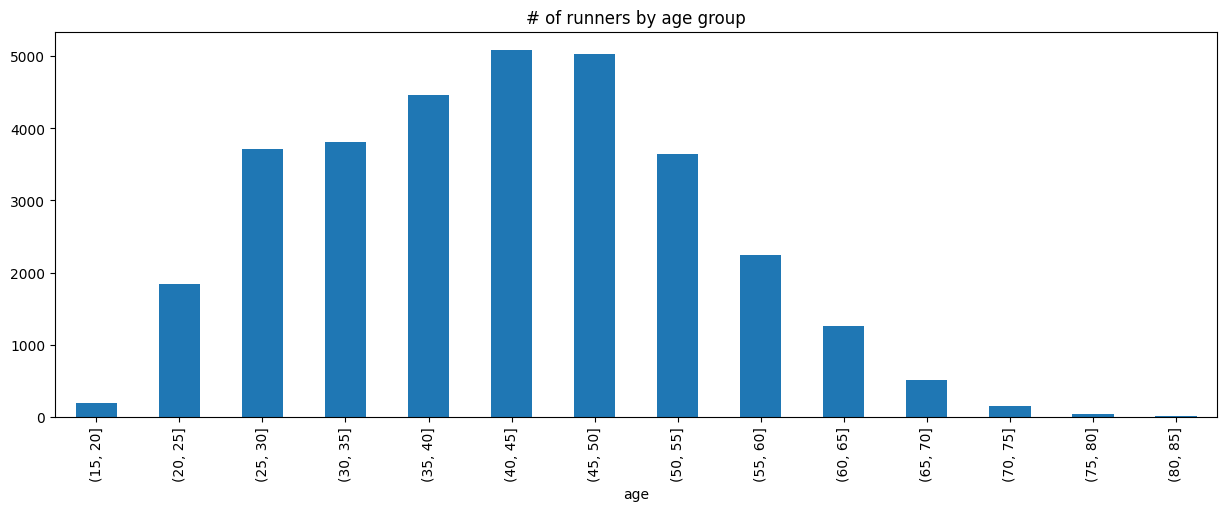

In [73]:
df['official'].groupby(pd.cut(df['age'], range(15,90,5))).aggregate(len).plot(kind="bar", title="# of runners by age group")

/var/folders/cj/3fpctnd52vv37y9gpdgg7c200000gn/T/ipykernel_37157/1957320534.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_and_time = df['official'].groupby([agebins, timebins]).aggregate(len)


CategoricalIndex(['15-20', '15-20', '15-20', '15-20', '15-20', '15-20',
                  '15-20', '15-20', '20-25', '20-25',
                  ...
                  '75-80', '75-80', '80-85', '80-85', '80-85', '80-85',
                  '80-85', '80-85', '80-85', '80-85'],
                 categories=['15-20', '20-25', '25-30', '30-35', ..., '65-70', '70-75', '75-80', '80-85'], ordered=True, dtype='category', name='age', length=112)

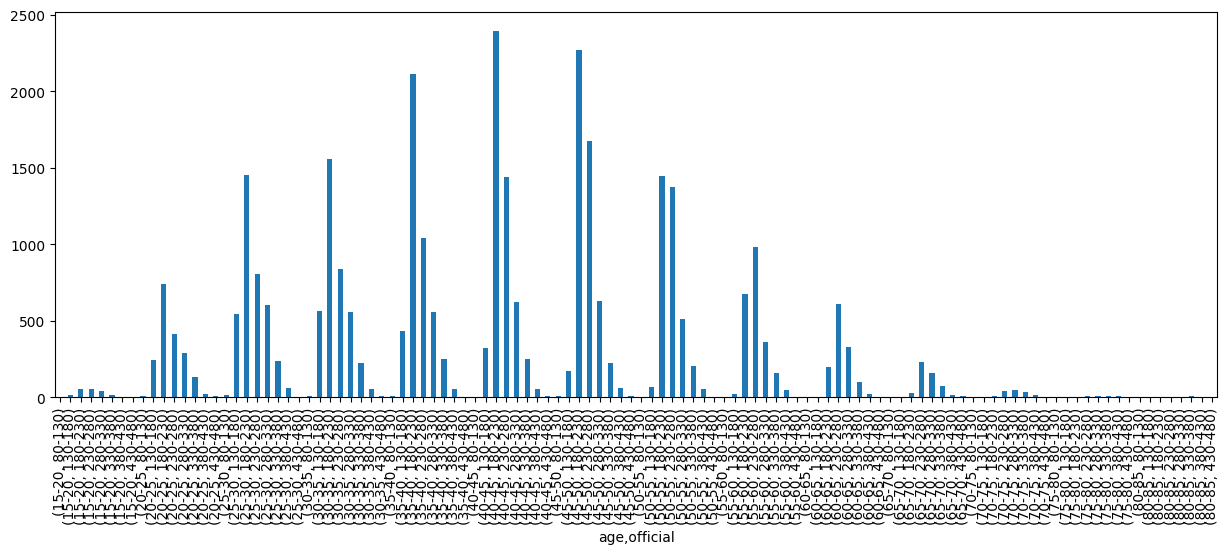

In [74]:
#Q: What's the distribution of finish times *within* an age group... small multiples
agegroups = range(15,90,5)
agebins = pd.cut(df['age'], agegroups,
                 labels=['{}-{}'.format(age,age+5) for age in agegroups][:-1])
times = range(80, 530, 50)
timebins = pd.cut(df['official'], times,
                  labels=['{}-{}'.format(t, t+50) for t in times][:-1])
age_and_time = df['official'].groupby([agebins, timebins]).aggregate(len)
#age_and_time = age_and_time.to_frame()
age_and_time.plot(kind="bar")
age_and_time.index.get_level_values(0)
#age_and_time["(15, 20]"]
#x = [age_and_time[ax] for ax in age_and_time.axes[0].levels[0]]
#x[0].values

In [75]:
pd.cut?

Signature:
pd.cut(
    x,
    bins,
    right: 'bool' = True,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    include_lowest: 'bool' = False,
    duplicates: 'str' = 'raise',
    ordered: 'bool' = True,
)
Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

Parameters
----------
x : array-like
    The input array to be binned. Must be 1-dimensional.
bins : int, sequence of scalars, or IntervalIndex
    The criteria to bin by.

    * int : Defines the number of equal-width bins in the range of `x`. The
      range of `x` is extended by .1% on each side to include the minimum
      and maximum values of `x`.
    * sequence of scalars : Defines the bin edges allowing

In [76]:
years = []
for year in range(2001, 2015):
    y = pd.read_csv("results/{}/results.csv".format(year), na_values="-")[["official", "gender", "age"]]
    y["year"] = str(year)
    years.append(y)
alltimes = pd.concat(years, ignore_index=True).dropna()

<Axes: title={'center': 'official'}, xlabel='year'>

<Figure size 1500x500 with 0 Axes>

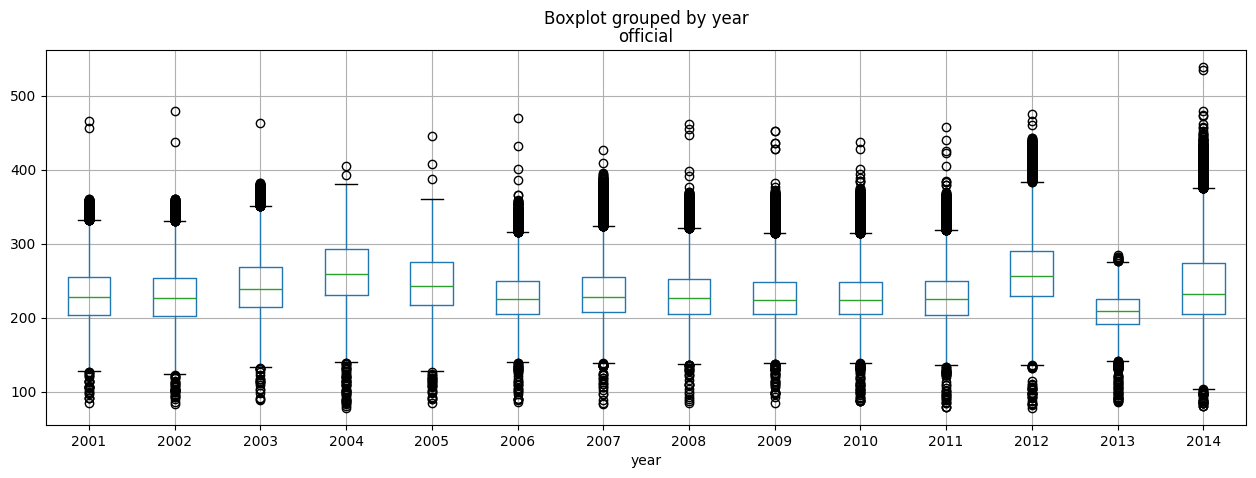

In [77]:
plt.figure()
alltimes.boxplot(column='official', by='year')

TypeError: Axes.bxp() got an unexpected keyword argument 'groupby'

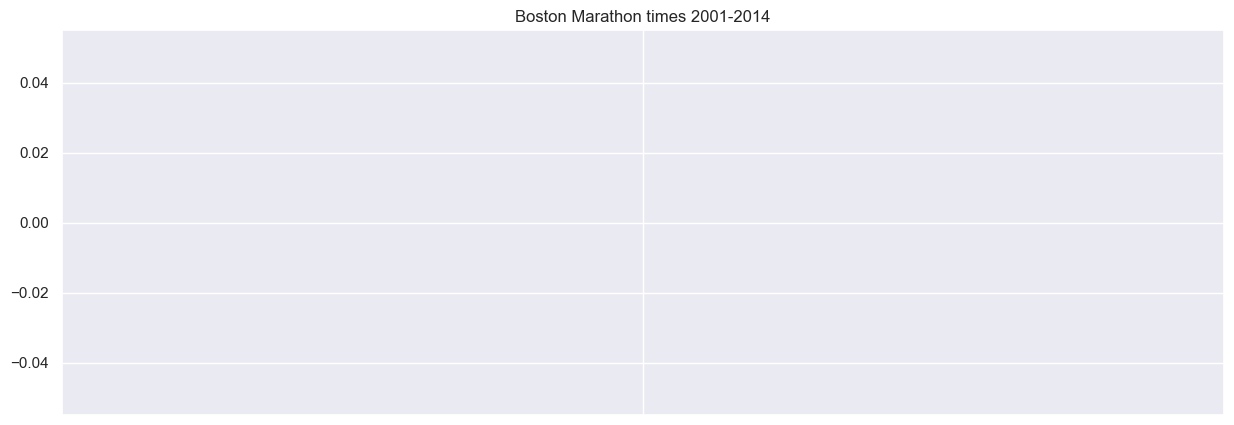

In [78]:
seaborn.set(context = 'notebook', style = 'darkgrid')
# not sure how to do this non-globally?
seaborn.set_context(rc={"figure.figsize": (15, 10)})

f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014")
seaborn.boxplot(pd.Series(alltimes.loc[:, "official"], name="Time in minutes"), groupby=alltimes.year)

AttributeError: FillBetweenPolyCollection.set() got an unexpected keyword argument 'groupby'

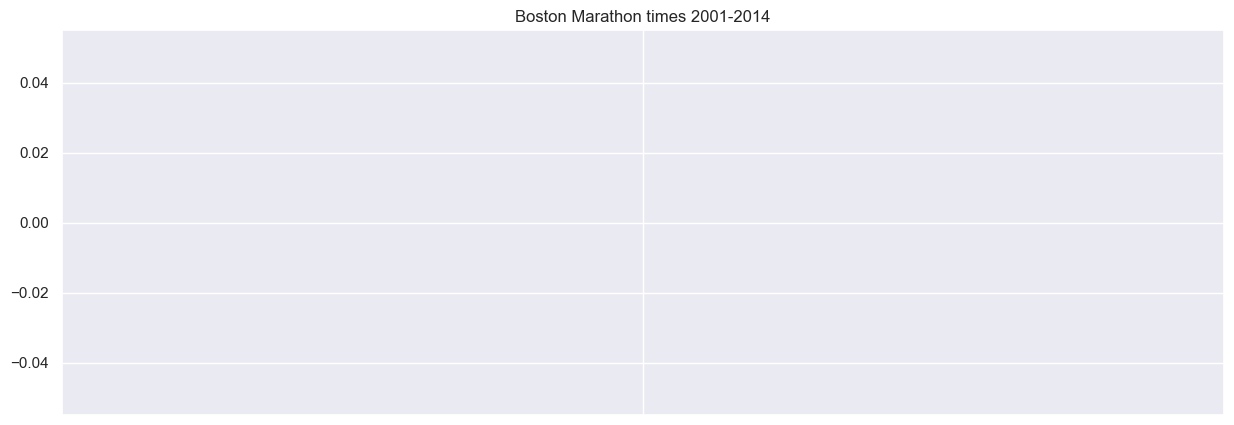

In [79]:
f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014")
seaborn.violinplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=alltimes.year, ax=ax1)

In [ ]:
f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014 by gender")
seaborn.violinplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=[alltimes.year, alltimes.gender], ax=ax1)

AttributeError: FillBetweenPolyCollection.set() got an unexpected keyword argument 'groupby'

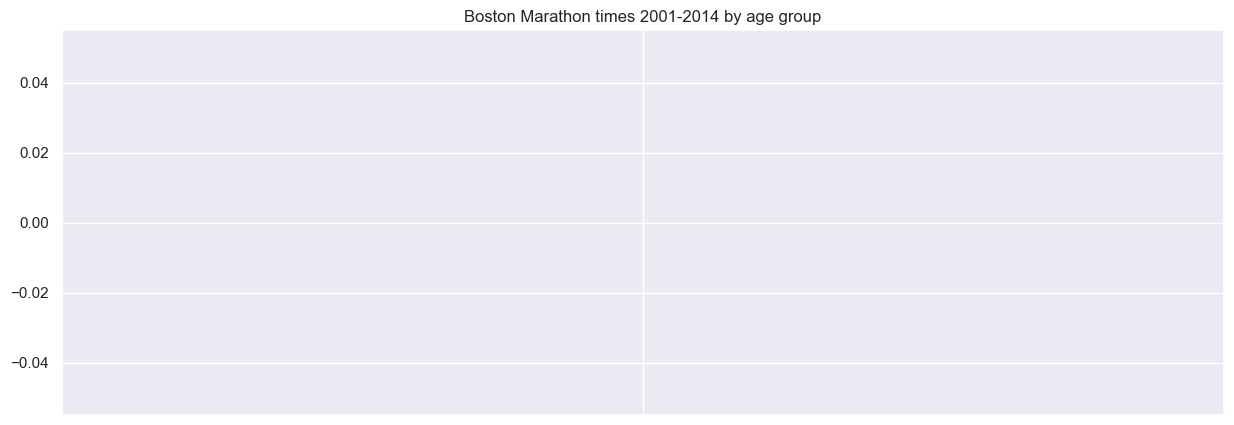

In [80]:
# wow that is a hideous, useless plot. Looks like women finish a predictable amount worse than men every year?
# I wonder how, across all years, age groups do. (That one might benefit from a gender split, more than the above)
# Also TODO: a map of the states & countries of Boston Marathon participants

alltimes
agegroups = range(15,90,5)
agebins = pd.cut(alltimes['age'], agegroups,
                 labels=['{}-{}'.format(age,age+5) for age in agegroups][:-1])

f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014 by age group")
seaborn.violinplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=agebins, ax=ax1)

TypeError: Axes.bxp() got an unexpected keyword argument 'groupby'

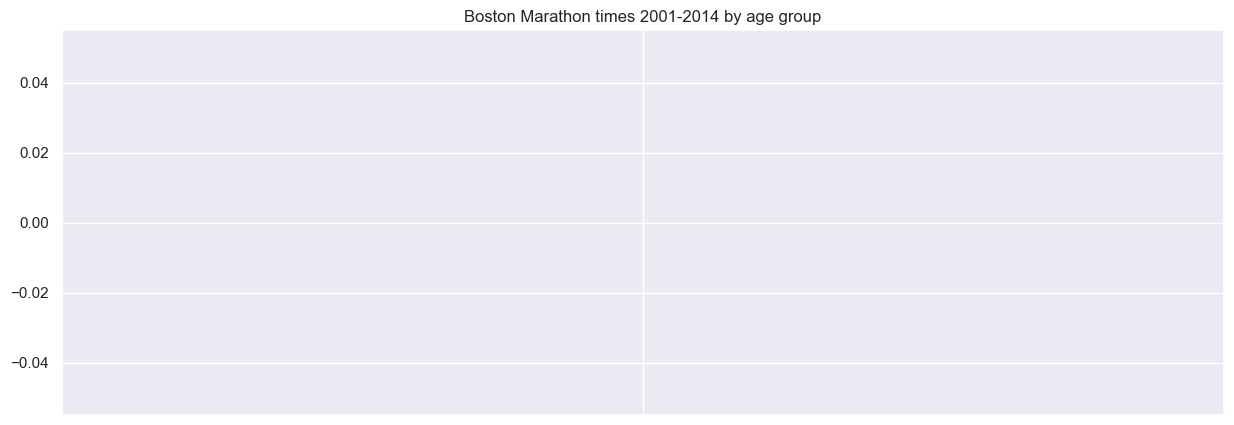

In [81]:
# wow that is a hideous, useless plot. Looks like women finish a predictable amount worse than men every year?
# I wonder how, across all years, age groups do. (That one might benefit from a gender split, more than the above)
# Also TODO: a map of the states & countries of Boston Marathon participants

alltimes
agegroups = range(15,90,5)
agebins = pd.cut(alltimes['age'], agegroups,
                 labels=['{}-{}'.format(age,age+5) for age in agegroups][:-1])

f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014 by age group")
seaborn.boxplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=agebins, ax=ax1)

### # wow that is a hideous, useless plot. Looks like women finish a predictable amount worse than men every year? # I wonder how, across all years, age groups do. (That one might benefit from a gender split, more than the above) # Also TODO: a map of the states & countries of Boston Marathon participants  alltimes agegroups = range(15,90,5) agebins = pd.cut(alltimes['age'], agegroups,                  labels=['{}-{}'.format(age,age+5) for age in agegroups][:-1])  f, ax1 = plt.subplots(1) ax1.set_title("Boston Marathon times 2001-2014 by age group") seaborn.violinplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=[alltimes.gender, agebins], ax=ax1) g = alltimes.groupby([agebins, alltimes.gender]) g.head()

In [82]:
years = []
for year in range(2001, 2015):
    y = pd.read_csv("results/{}/results.csv".format(year), na_values="-")[["state"]]
    years.append(y)
states = pd.concat(years, ignore_index=True).dropna()
g = states.groupby("state") #.aggregate(len)
h = g.count()


In [83]:
import json
json.dumps(h.to_dict()['state'])

KeyError: 'state'

In [84]:
dict(sorted(h.to_dict().iteritems()))

AttributeError: 'dict' object has no attribute 'iteritems'

In [85]:
years = []
for year in range(2001, 2015):
    y = pd.read_csv("results/{}/results.csv".format(year), na_values="-")[["country"]]
    years.append(y)
states = pd.concat(years, ignore_index=True).dropna()
g = states.groupby("country") #.aggregate(len)
h = g.count()

In [86]:
json.dumps(h.to_dict()['country'])

KeyError: 'country'